<a href="https://colab.research.google.com/github/Roubish/Fashion-MNIST-Dataset/blob/main/Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify Clothes from Fashion MNIST Dataset using Machine Learning Techniques 

In [9]:
#importing the necessary modules.
import numpy as np    
import pandas as pd
import gzip
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [10]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [11]:
# The below variable contains location path for Training dataset
filePath_train_set = 'train-images-idx3-ubyte.gz'
filePath_train_label = 'train-labels-idx1-ubyte.gz'
filePath_test_set = 't10k-images-idx3-ubyte.gz'
filePath_test_label = 't10k-labels-idx1-ubyte.gz'

In [12]:
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

In [15]:
print(type(testLabel))
print(trainSet.shape)
print(trainLabel.shape)
print(testSet.shape)
print(testLabel.shape)
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


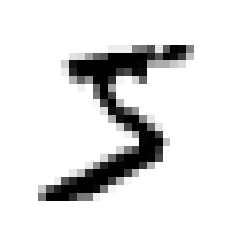

In [17]:
# Please use the showImage() created earlier to show image at X_train[0] as shown below
showImage(X_train[0])

In [18]:
# Please check the corresponding article name (class) in target dataset (y_train[0]) if it matches the above image by using below code
y_train[0]

5

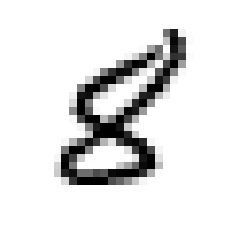

In [121]:
showImage(X_train[1128])

In [122]:
y_train[1128]

8

In [21]:
# Create a random seed=42
np.random.seed(42)   # if you want reproducible results set the random seed value.

In [22]:
# Create shuffle indices of size 60000 (as we have 60000 images in the training dataset) and store it in a variable 'shuffle_index'
shuffle_index = np.random.permutation(60000)

In [23]:
# Shuffle the indices of X_train and y_train datasets by using 'shuffle_index' variable created above.
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [25]:
#Import StandardScaler from SKLearn's preprocessing
from sklearn.preprocessing import StandardScaler

In [26]:
# Create an instance of StandardScaler and store it in variable called 'scaler'
scaler = StandardScaler()

In [28]:
# Apply standardization on training dataset X_train using the above created StandardScaler instance scaler using fit_transform method and store the scaled training dataset in X_train_scaled variable.
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [30]:
# (1) Import accuracy_score from SKLearn
from sklearn.metrics import accuracy_score

In [31]:
# (2) Import precision_score and recall_score from SKLearn
from sklearn.metrics import precision_score, recall_score

In [32]:
# (3) Import f1_score from SKLearn
from sklearn.metrics import f1_score

In [33]:
# Import LogisticRegression from SKLearn
from sklearn.linear_model import  LogisticRegression

In [34]:
# Create an instance of LogisticRegression by passing parameters - multi_class="multinomial", solver="lbfgs", C=10 and random_state=42 to the constructor and store this created instance in a variable called 'log_clf'.
# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10, random_state=42)
# 'C' is hyprparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm

In [35]:
# Now, train the model on 'scaled' training dataset
log_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Make prediction on an instance from the training dataset (say instance at index '0' i.e. X_train[0]) using the above trained model 'log_clf', and store the predicted value in a variable called y_train_predict
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

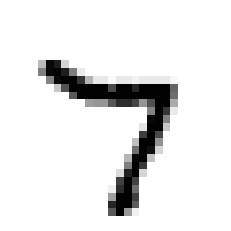

In [38]:
# Let us compare the actual value to the predicted value of the label. You can use showImage() function to see the image.
y_train[0] 
y_train_predict[0]
showImage(X_train[0])

In [39]:
#Make the predictions on the complete training dataset X_train_scaled using the above trained model 'log_clf' and save the result in variable 'y_train_predict'
y_train_predict = log_clf.predict(X_train_scaled)

- Calculate the various metrics scores like - accuracy, precision, recall, F1 score - using the actual and the predicted values and relevant functions, - and store them in respective variables - log_accuracy, log_precision, log_recall and log_f1_score.

In [40]:
log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')

In [41]:
# print the above metrics values (accuracy, etc.) using the print() function
print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_recall)
print("Logistic F1 Score: ", log_f1_score)

Logistic Accuracy:  0.9435333333333333
Logistic Precision:  0.9434388220018844
Logistic Recall:  0.9435333333333333
Logistic F1 Score:  0.9434703392789886


## Training the Model - RandomForestClassifier
Let us now train the RandomForestClassifier. We will be doing the following as part of this exercise:

- 1.We will be first training the RandomForestClassifier on the training dataset
- 2.Using the trained model, make the prediction on a sample instance and compare the prediction with the actual value.
- 3.Using the trained model, make the prediction on the whole training dataset
- 4.Calculate - accuracy, precision, recall and F1 Score for RandomForestClassifier.

In [42]:
# Import RandomForestClassifier from SKLearn
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Create an instance of RandomForestClassifier by passing parameters - n_estimators=20, max_depth=10, random_state=42, and store this created instance in a variable called 'rnd_clf'.
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree based algorithms like Random Forest and XGBoost

In [45]:
# Now, train the model on training dataset
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [46]:
# Make prediction on an instance from the training dataset (say instance at index '0' i.e. X_train[0]) using the above trained model 'rnd_clf', and store the predicted value in a variable called y_train_predict
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

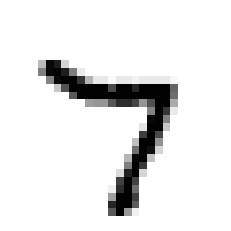

In [47]:
# Let us compare the actual value (digit) to the predicted value (digit). You can use showImage() function to see the image.
y_train[0] 
y_train_predict[0]
showImage(X_train[0])

In [48]:
# Make the predictions on the complete training dataset X_train using the above trained model 'rnd_clf' and save the result in variable 'y_train_predict'
y_train_predict = rnd_clf.predict(X_train)

- Calculate the various metrics scores like - accuracy, precision, recall, F1 score - using the actual and the predicted values and relevant functions, - and store them in respective variables - rnd_accuracy, rnd_precision, rnd_recall and rnd_f1_score.

In [49]:
rnd_accuracy = accuracy_score(y_train, y_train)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')

In [50]:
# print the above metrics values (accuracy, etc.) using the print() function
print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_recall)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  1.0
Random Forest Precision:  0.956929781436425
Random Forest Recall:  0.9567666666666667
Random Forest F1 Score:  0.9567871235792454


## Selecting the Model - Cross-Validation

In [67]:
# Import the module cross_val_score and cross_val_predict from sklearn.model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict

In [63]:
# Import the module confusion_matrix from sklearn.metrics.
from sklearn.metrics import confusion_matrix

- Define a function called display_scores() which should print the score value which is passed to it as argument, and also calculate and print the 'mean' and 'standard deviation' of this score.

In [64]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

- create an instance of LogisticRegression called log_clf by passing to it the parameters - multi_class="multinomial", solver="lbfgs", C=10 and random_state=42

In [65]:
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42) 

Please call cross_val_score() function by passing following parameters to it - the model (log_clf), the scaled training dataset (X_train_scaled), y_train, cv=3 and scoring="accuracy" - and save the returned value in a variable called log_cv_scores.

Call display_scores() function, by passing to it the log_cv_scores variable, to calculate and display(print) the 'accuracy' score, the mean of the 'accuracy' score and the 'standard deviation' of the 'accuracy' score.

In [68]:
log_cv_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(log_cv_scores)  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Scores: [0.909   0.90845 0.9058 ]
Mean: 0.9077500000000001
Standard deviation: 0.001397020639313041


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
# Call mean() method on log_cv_scores object to get the mean accuracy score and store this mean accuracy score in a variable log_cv_accuracy.
log_cv_accuracy = log_cv_scores.mean()

- Now call cross_val_predict() function by passing following parameters to it - the model (log_clf), the scaled training dataset (X_train_scaled), y_train, cv=3 - and save the returned value in a variable called y_train_pred.

In [72]:
y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)
# Compute the confusion matrix by using confusion_matrix() function
confusion_matrix(y_train, y_train_predict)
# Calculate the precision score by the using the precision_score() function
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
# Calculate the recall score by the using the recall_score() function
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
# Calculate the F1 score by the using the f1_score() function
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [73]:
# Print the above calculated values of log_cv_accuracy, log_cv_precision, log_cv_recall , log_cv_f1_score
print("Logistic CV Accuracy: ", log_cv_accuracy)
print("Logistic CV Precision: ", log_cv_precision)
print("Logistic CV Recall: ", log_cv_recall)
print("Logistic CV F1 Score: ", log_cv_f1_score)

Logistic CV Accuracy:  0.9077500000000001
Logistic CV Precision:  0.9074892331190823
Logistic CV Recall:  0.90775
Logistic CV F1 Score:  0.9075791048549036


## Selecting the Model - Cross-Validation - RandomForestClassifier

- create an instance of RandomForestClassifier called rnd_clf by passing to it the parameters - n_estimators=20, max_depth=10 and random_state=42

In [74]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

we are call cross_val_score() function by passing following parameters to it - the model (rnd_clf), the training dataset (X_train), y_train, cv=3 and scoring="accuracy" - and save the returned value in a variable called rnd_cv_scores.

Call display_scores() function, by passing to it the rnd_cv_scores variable, to calculate and display(print) the 'accuracy' score, the mean of the 'accuracy' score and the 'standard deviation' of the 'accuracy' score.

In [76]:
rnd_cv_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(rnd_cv_scores)

Scores: [0.939   0.9343  0.93265]
Mean: 0.9353166666666667
Standard deviation: 0.002690208583404289


In [77]:
# Call mean() method on rnd_cv_scores object to get the mean accuracy score and store this mean accuracy score in a variable rnd_cv_accuracy.
rnd_cv_accuracy = rnd_cv_scores.mean()

- call cross_val_predict() function by passing following parameters to it - the model (rnd_clf), the training dataset (X_train), y_train, cv=3 - and save the returned value in a variable called y_train_pred.

In [79]:
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)

In [80]:
# Compute the confusion matrix by using confusion_matrix() function
confusion_matrix(y_train, y_train_pred)
# Calculate the precision score by the using the precision_score() function
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
# Calculate the recall score by the using the recall_score() function
rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
# Calculate the F1 score by the using the f1_score() function
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [81]:
# Print the above calculated values of rnd_cv_accuracy, rnd_cv_precision, rnd_cv_recall , rnd_cv_f1_score
print("Random Forest CV Accuracy: ", rnd_cv_accuracy)
print("Random Forest CV Precision: ", rnd_cv_precision)
print("Random Forest CV Recall: ", rnd_cv_recall)
print("Random Forest CV F1 Score: ", rnd_cv_f1_score)

Random Forest CV Accuracy:  0.9353166666666667
Random Forest CV Precision:  0.9354923475845908
Random Forest CV Recall:  0.9353166666666667
Random Forest CV F1 Score:  0.9353016646546045


## Selecting the Model - Cross-Validation - The Conclusion

In [82]:
print("=== Softmax === ")
display_scores(log_cv_scores)
print("log_cv_accuracy:", log_cv_accuracy)
print("log_cv_precision:", log_cv_precision)
print("log_cv_recall:", log_cv_recall)
print("log_cv_f1_score:", log_cv_f1_score)

print("=== Random Forest === ")
display_scores(rnd_cv_scores)
print("rnd_cv_accuracy:", rnd_cv_accuracy)
print("rnd_cv_precision:", rnd_cv_precision)
print("rnd_cv_recall :", rnd_cv_recall )
print("rnd_cv_f1_score:", rnd_cv_f1_score)

=== Softmax === 
Scores: [0.909   0.90845 0.9058 ]
Mean: 0.9077500000000001
Standard deviation: 0.001397020639313041
log_cv_accuracy: 0.9077500000000001
log_cv_precision: 0.9074892331190823
log_cv_recall: 0.90775
log_cv_f1_score: 0.9075791048549036
=== Random Forest === 
Scores: [0.939   0.9343  0.93265]
Mean: 0.9353166666666667
Standard deviation: 0.002690208583404289
rnd_cv_accuracy: 0.9353166666666667
rnd_cv_precision: 0.9354923475845908
rnd_cv_recall : 0.9353166666666667
rnd_cv_f1_score: 0.9353016646546045


From the results of the cross-validation process, we see that both the logistic regression and random forest have given the best results (nearly accuracy - 85%, standard deviation for accuracy - 0.002, Precision, Recall, F1 score nearly 0.85).

Let us use Voting Classifier and proceed with the fine-tuning of the model (hyperparameters tuning).

## Fine-Tuning the Model - Grid Search - Dimensionality Reduction

In [83]:
# Import PCA from SKLearn 
from sklearn.decomposition import PCA

In [84]:
# Create an instance of PCA called 'pca', by passing to it the parameter n_components=0.99 (i.e. variance ratio of 0.99)
pca = PCA(n_components=0.99)

In [85]:
# Apply PCA on the training dataset X_train dataset and save the result in a variable called X_train_reduced
X_train_reduced = pca.fit_transform(X_train)

In [86]:
# Please check the number of components (features) present in the X_train_reduced dataset
pca.n_components_

331

In [87]:
# Please check if you have hit a total of 99% explained variance ratio with the select number of components:
np.sum(pca.explained_variance_ratio_)

0.9900129426354097

- Check if there is any loss of information due to dimensionality reduction. You can do this by recovering (decompressing) some of the images (instances) of X_train_reduced dataset.

Let us recover (decompress) some of the images (instances) of X_train_reduced dataset and check.

Please use inverse_transform function to decompress the compressed dataset (X_train_reduced) back to 784 dimensions , and save the resulting dataset in X_train_recovered variable.

In [89]:
X_train_recovered = pca.inverse_transform(X_train_reduced)

Use the below code and function as it is. It will display the original image and the compressed image (that was recovered after decompression).

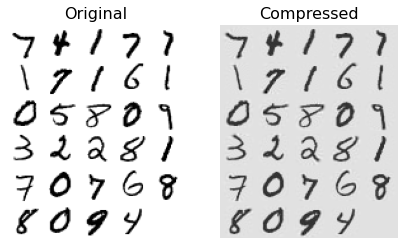

In [91]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

The comparison of the 'original' dataset images and the 'compressed' dataset images (got after decompression) shows that there is not much information loss due to dimensionality reduction by using 0.99 variance ratio.

## Fine-Tuning the Model - Grid Search - Tuning Hyperparameters

In [115]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV


log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10 , random_state=42)


voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10, 15],
    }]

grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=3, scoring="neg_mean_squared_error")


grid_search.fit(X_train_reduced, y_train)
grid_search.best_params_
grid_search.best_estimator_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


1.20135340345795 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.1747765745025731 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


## Evaluating Final Model on Test Dataset

Final Accuracy:  0.9289
Final Precision:  0.9286755881624962
Final Recall:  0.9289
Final F1 Score:  0.9286575890829212


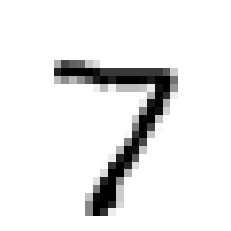

In [118]:
# Evaluate model on the test Set

final_model = grid_search.best_estimator_
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Remember, you have to use pca object of training dataset (you got on training dataset during dimensionality reduction)
# and only apply transform on test dataset (not fit_transform) - highly important

X_test_reduced = pca.transform(X_test)
y_test_predict = final_model.predict(X_test_reduced)

confusion_matrix(y_test, y_test_predict)
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')


print("Final Accuracy: ", final_accuracy)
print("Final Precision: ", final_precision)
print("Final Recall: ", final_recall)
print("Final F1 Score: ", final_f1_score)

# Just check with a sample value, if the predictions were correct
y_test[0]
y_test_predict[0]
showImage(X_test[0])